<a href="https://colab.research.google.com/github/MachukaJoy/NLP_with_Disaster_Tweets/blob/main/Module9_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime
from warnings import filterwarnings

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

from warnings import filterwarnings
warnings.filterwarnings('ignore')

# Previewing Data

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


# Data Cleaning

In [5]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


In [6]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_train['keyword'] = df_train['keyword'].fillna('unknown')
df_train['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_train.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [7]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_test['keyword'] = df_train['keyword'].fillna('unknown')
df_test['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_test.isnull().sum())

id          0
keyword     0
location    0
text        0
dtype: int64


In [8]:
# check for duplicated values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [9]:
# Count occurrences of each location
location_counts = df_train['location'].value_counts()

# Display the counts
print(location_counts)

# Counts as a DataFrame
location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['Location', 'Count']

# Display the top 10 locations
print(location_counts_df.head(50))

location
unknown                         2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3342, dtype: int64
             Location  Count
0             unknown   2533
1                 USA    104
2            New York     71
3       United States     50
4              London     45
5              Canada     29
6             Nigeria     28
7                  UK     27
8     Los Angeles, CA     26
9               India     24
10             Mumbai     22
11     Washington, DC     21
12              Kenya     20
13          Worldwide     19
14        Chicago, IL     18
15          Australia     18
16         California     17
17       New York, NY 

We see the location column needs a lot of cleaning for instance we have New york, New York City, New York, NY, NYC and probably others. We will therefore proceed to drop the column together with id column

# Text Preprocessing

In [11]:
# Core packages for text processing.
import re
import string

# Libraries for text preprocessing.
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob, Word

# from collections import Counter, defaultdict
# from PIL import Image
# import spacy
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
# import en_core_web_sm

In [12]:
# Download required NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
!pip install langdetect

In [14]:
from langdetect import detect
from textblob import TextBlob

In [15]:
# Preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

In [16]:
df_train['clean_text'] = df_train['clean_text'].str.replace('[^\w\s]', '', regex=True)
df_test['clean_text'] = df_test['clean_text'].str.replace('[^\w\s]', '', regex=True)


# Exploraratory Data Analysis

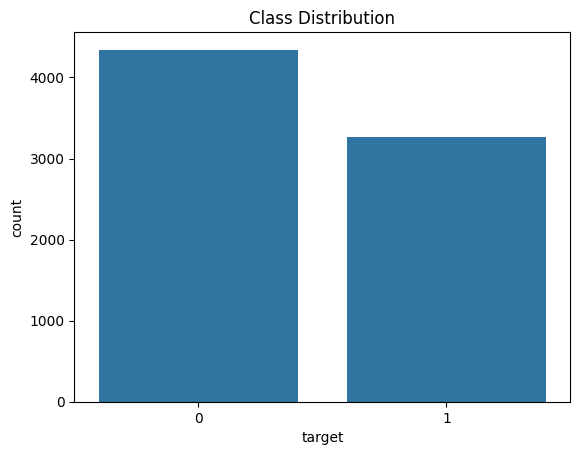

In [17]:
# Class distribution
sns.countplot(data=df_train, x='target')
plt.title('Class Distribution')
plt.show()

In [18]:
# Most frequent keywords
print(df_train[df_train['target'] == 1]['keyword'].value_counts().head(10))
print(df_train[df_train['target'] == 0]['keyword'].value_counts().head(10))

keyword
unknown              42
wreckage             39
outbreak             39
derailment           39
typhoon              37
debris               37
oil%20spill          37
rescuers             32
suicide%20bombing    32
suicide%20bomb       32
Name: count, dtype: int64
keyword
body%20bags    40
harm           37
armageddon     37
deluge         36
ruin           36
wrecked        36
twister        35
explode        35
fear           35
siren          35
Name: count, dtype: int64


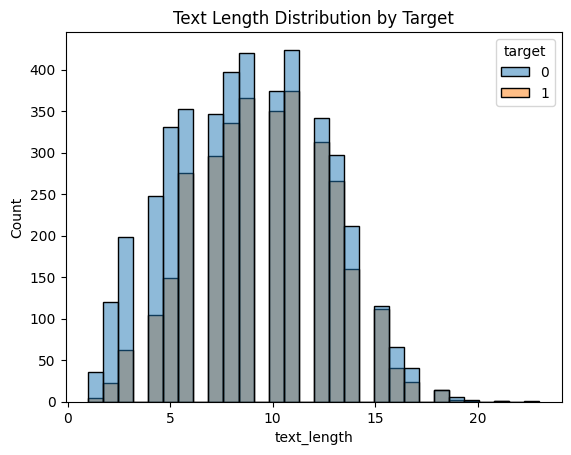

In [19]:
# Text length analysis
df_train['text_length'] = df_train['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data=df_train, x='text_length', hue='target', bins=30)
plt.title('Text Length Distribution by Target')
plt.show()

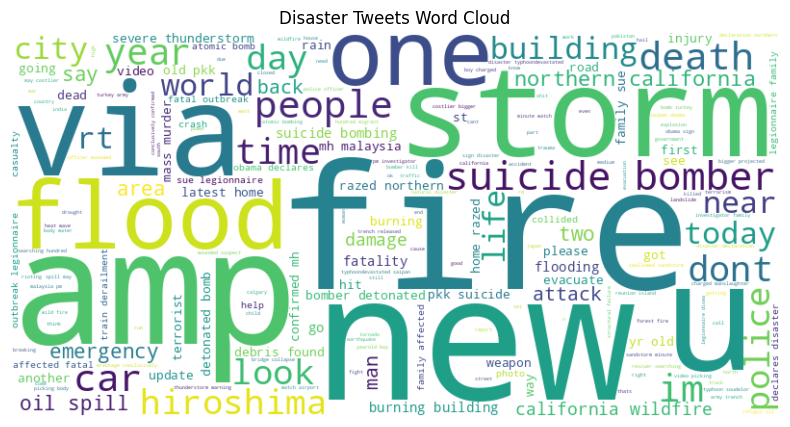

In [20]:
# Word Cloud
disaster_words = ' '.join(df_train[df_train['target'] == 1]['clean_text'])
non_disaster_words = ' '.join(df_train[df_train['target'] == 0]['clean_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Disaster Tweets Word Cloud')
plt.show()

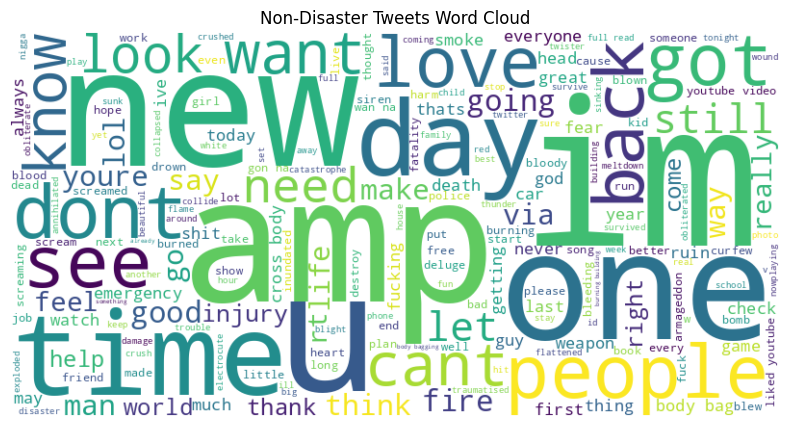

In [21]:
wc = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Disaster Tweets Word Cloud')
plt.show()

# Feature Engineering

In [22]:
# !pip install keras-core --upgrade
# !pip install -q keras-nlp --upgrade

In [23]:
# import tensorflow as tf
# import keras_core as keras
# import keras_nlp
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# print("TensorFlow version:", tf.__version__)
# print("KerasNLP version:", keras_nlp.__version__)

In [24]:
# # Core packages for text processing.

# import string
# import re

# # Libraries for text preprocessing.

# import nltk
# from nltk.corpus import stopwords, wordnet
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import LabelEncoder
# from textblob import TextBlob
# from textblob import Word

In [25]:
# # Setting some options for general use.

# stop = set(stopwords.words('english'))
# plt.style.use('fivethirtyeight')
# sns.set(font_scale=1.5)
# pd.options.display.max_columns = 250
# pd.options.display.max_rows = 250
# warnings.filterwarnings('ignore')


# #Setting seeds for consistent results.
# seed_val = 42
# random.seed(seed_val)
# np.random.seed(seed_val)
# torch.manual_seed(seed_val)
# torch.cuda.manual_seed_all(seed_val)

In [26]:
# Duplicate df_train to create trainv
trainv = df_train.copy()
testv = df_test.copy()

In [27]:
# Remove 'text' column and rename 'clean_text' to 'text' in trainv
trainv = trainv.drop(columns=['text']).rename(columns={'clean_text': 'text'})

# Remove 'text' column and rename 'clean_text' to 'text' in testv
testv = testv.drop(columns=['text']).rename(columns={'clean_text': 'text'})


In [28]:
print(trainv['text'])
print(testv['text'])

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object
0                             happened terrible car crash
1       heard earthquake different city stay safe ever...
2       forest fire spot pond goose fleeing across str...
3                    apocalypse lighting spokane wildfire
4                      typhoon soudelor kill china taiwan
                              ..

In [29]:
temp_df1 = pd.Series(' '.join(trainv['text']).split()).value_counts()
temp_df1

,count
fire,352
like,347
im,306
amp,300
get,255
...,...
crapgamer,1
gamescom,1
hotteennsfwpornmilf,1
oiled,1


In [30]:
temp_df2 = pd.Series(' '.join(testv['text']).split()).value_counts()
temp_df2

,count
fire,159
like,146
amp,136
get,127
im,125
...,...
suggested,1
indy,1
otl,1
quinhii,1


In [31]:
drops1 = temp_df1[temp_df1 <= 1]
drops2 = temp_df2[temp_df2 <= 1]

In [32]:
trainv['text'] = trainv['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops1))

In [33]:
testv['text'] = testv['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops2))

In [34]:
print(trainv['text'])

0              deed reason earthquake may allah forgive u
1                              forest fire near la canada
2       resident asked shelter place officer evacuatio...
3       people receive wildfire evacuation order calif...
4             got sent photo alaska smoke wildfire school
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object


In [35]:
# DataFrame'de işlem yap
trainv['text'].apply(lambda x: TextBlob(x).words).head()

,text
0,"[deed, reason, earthquake, may, allah, forgive..."
1,"[forest, fire, near, la, canada]"
2,"[resident, asked, shelter, place, officer, eva..."
3,"[people, receive, wildfire, evacuation, order,..."
4,"[got, sent, photo, alaska, smoke, wildfire, sc..."


In [36]:
testv['text'].apply(lambda x: TextBlob(x).words).head()

,text
0,"[happened, terrible, car, crash]"
1,"[heard, earthquake, different, city, stay, saf..."
2,"[forest, fire, spot, pond, across, street, save]"
3,"[apocalypse, lighting, wildfire]"
4,"[typhoon, soudelor, kill, china, taiwan]"


In [37]:
trainv['n_tokens'] = trainv['text'].apply(lambda x: len(TextBlob(x).words))

In [38]:
testv['n_tokens'] = testv['text'].apply(lambda x: len(TextBlob(x).words))

In [39]:
trainv['text'] = trainv['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [40]:
testv['text'] = testv['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [69]:
tf1=(trainv['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0))

In [70]:
tf2=(testv['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0))

In [71]:
tf1.columns=['words','tf1']

In [72]:
tf2.columns=['words','tf2']

In [73]:
tf2.sort_values(ascending=False)

,0
fire,159.0
like,146.0
amp,136.0
get,127.0
im,125.0
...,...
production,2.0
beer,2.0
floated,2.0
tampa,2.0


In [74]:
tf1.sort_values(ascending=False)

,0
fire,352.0
like,347.0
im,306.0
amp,300.0
u,261.0
...,...
earbuds,2.0
tiger,2.0
plastic,2.0
strict,2.0


In [75]:
text = " ".join(i for i in trainv.text)

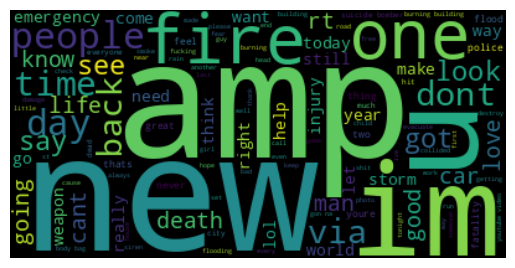

In [76]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Modelling

In [77]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [78]:
from sklearn.model_selection import cross_val_score
# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
sia = SentimentIntensityAnalyzer()

In [80]:
sia.polarity_scores("The fire is new")

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}

In [81]:
sia.polarity_scores("Going back is hard")

{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.1027}

In [82]:
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x))

,text
0,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
1,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp..."
6,"{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp..."
7,"{'neg': 0.293, 'neu': 0.488, 'pos': 0.22, 'com..."
8,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp..."
9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [83]:
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

,text
0,0.2732
1,-0.3400
2,0.0000
3,0.0000
4,0.0000
5,-0.3400
6,-0.6249
7,-0.1531
8,-0.3818
9,0.0000


In [84]:
trainv['polarity_scores'] = trainv['text'].apply(lambda x: sia.polarity_scores(x))

In [85]:

trainv["text"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

,text
0,pos
1,neg
2,neg
3,neg
4,neg
5,neg
6,neg
7,neg
8,neg
9,neg


In [86]:
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

,text
0,0.2732
1,-0.3400
2,0.0000
3,0.0000
4,0.0000
5,-0.3400
6,-0.6249
7,-0.1531
8,-0.3818
9,0.0000


In [87]:
trainv["sentiment_label"] = trainv["text"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")


trainv["sentiment_label"].value_counts()

,count
sentiment_label,
neg,5674
pos,1939


In [88]:

trainv["sentiment_label"] = LabelEncoder().fit_transform(trainv["sentiment_label"])


y = trainv["sentiment_label"]
X = trainv["text"]

In [89]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names_out()[10:15]

array(['abia', 'ability', 'ablaze', 'able', 'abomb'], dtype=object)

In [90]:
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [91]:
log_model = LogisticRegression().fit(X_count, y)

In [92]:
cross_val_score(log_model, X_count, y, scoring="accuracy", cv=5).mean()

0.8376460630386635

In [93]:
new_rewiew = pd.Series("this product is great")


new_rewiew = vectorizer.fit(X).transform(new_rewiew)


log_model.predict(new_rewiew)

array([1])